### Reading in Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
#reading in data.csv file
tissue_pd = pd.read_csv("data.csv")

In [3]:
#looking at first five rows of our data
tissue_pd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(tissue_pd.shape)
print("569 rows and 33 columns")

(569, 33)
569 rows and 33 columns


Our project dataset is from the UCI Machine Learning Repository. Each row represents a patient and information around their breast tissue imaging, especially with respect to cell nuclei. 

### Missing Data?

In [5]:
#loop through columns in dataframe
#check for any NaN values
for col in tissue_pd.columns:
    print(col + ": " + str(tissue_pd[col].isnull().values.any()))

id: False
diagnosis: False
radius_mean: False
texture_mean: False
perimeter_mean: False
area_mean: False
smoothness_mean: False
compactness_mean: False
concavity_mean: False
concave points_mean: False
symmetry_mean: False
fractal_dimension_mean: False
radius_se: False
texture_se: False
perimeter_se: False
area_se: False
smoothness_se: False
compactness_se: False
concavity_se: False
concave points_se: False
symmetry_se: False
fractal_dimension_se: False
radius_worst: False
texture_worst: False
perimeter_worst: False
area_worst: False
smoothness_worst: False
compactness_worst: False
concavity_worst: False
concave points_worst: False
symmetry_worst: False
fractal_dimension_worst: False
Unnamed: 32: True


There are no missing values in our data!!

### Checking for Duplicates

In [6]:
#checking for row-level duplicates in entire dataframe

print(tissue_pd.duplicated())

print("\nSum of duplicate categories: ")
print(tissue_pd.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

Sum of duplicate categories: 
0


There are no row-level duplicates in our dataset!

### Data Exploration

In [7]:
#looking at column types
tissue_pd.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

There are three layers of our data: the mean (_mean), standard error (_se) and "worst" (_worst) which denotes the largest value i.e. the mean of the three largest values in the cell data. 

Our target value in terms of logistic regression is the variable 'diagnosis'. It is currently denoted as an object type; however, for regression purposes, we will convert it to a numerical type with encoding towards the end of this analysis. 

All of the other variables are floats, and they are rounded to 4 significant figures. 

In [8]:
#converting id variable to type string
tissue_pd['id'] = tissue_pd['id'].astype(str)

In [9]:
#describing the data
tissue_pd.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


From looking at the description of the numerical variables, I am going to remove the column 'Unnamed:32', as it does not have any values besides NaN. It will not be helpful in our analysis or modeling.

In [10]:
#dropping Unnamed column
tissue_pd = tissue_pd.drop(['Unnamed: 32'],axis='columns')

In [11]:
tissue_pd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


I also want to look at the class distribution of our target variable 'diagnosis', as it will help us understand if we need to account for class imbalance in our modeling.

B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:>

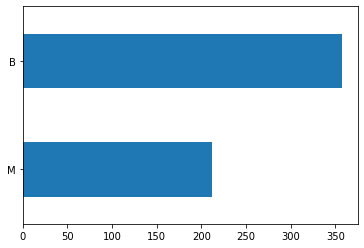

In [12]:
#looking at value counts of diagnosis variable
print(tissue_pd['diagnosis'].value_counts())
tissue_pd['diagnosis'].value_counts().sort_values().plot(kind = 'barh')

Out of the 569 patients that were screened for breast cancer, 357 were diagnosed with benign masses, meaning they do not have breast cancer. The other 212 patients were found to have malignant or cancerous tumors.

In terms of class distribution, they are pretty equal in sample size, and I would say that the classes are not imbalanced.

1/2 * 569 = 284.5

- Benign class is slightly above half
- Malignant class is slightly below half

### Data Visualizations

##### Histograms of Numeric Variables

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

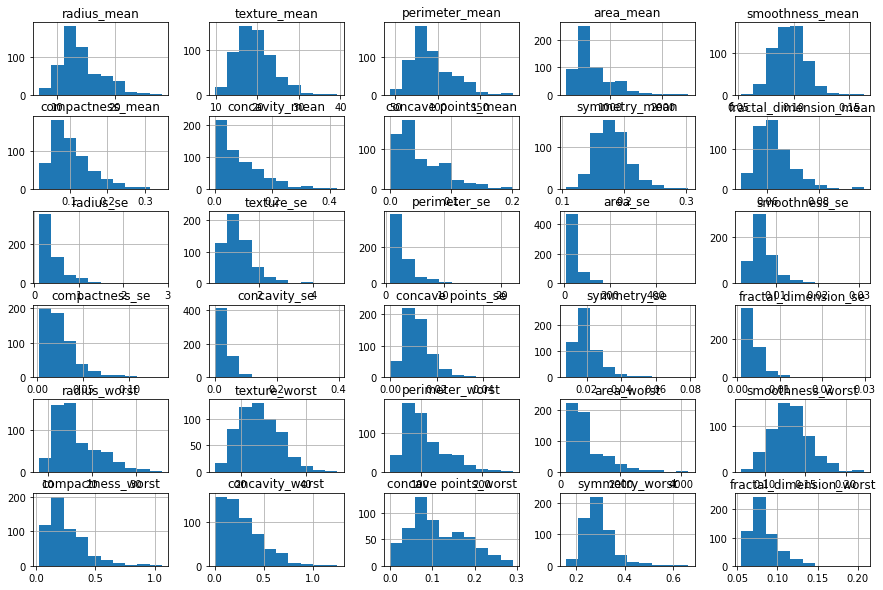

In [13]:
tissue_pd.hist(bins=10, figsize=(15, 10))

Most of the distributions for the numerical variables in the dataset lean towards a positive skew (majority of the points are at the lower value range). 

There are a few distributions that are relatively normal though: texture_mean, smoothness_mean, symmetry_mean, texture_worst and smoothness_worst. They are mostly centered around the mean of the column values, and follow a relatively similar Guassian distribution. There are also some variables which may contain outliers, and when those are assessed and possibly removed, we can look at their histograms again to assess normality.

#### Boxplots of Numerical Variables -- Assessing Outliers

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='perimeter_mean'>

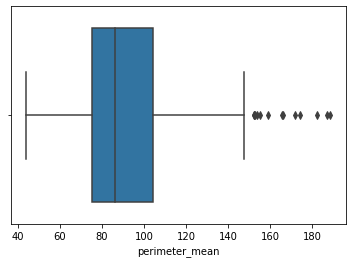

In [14]:
#boxplot of perimeter_mean
sns.boxplot(tissue_pd['perimeter_mean'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='concave points_mean'>

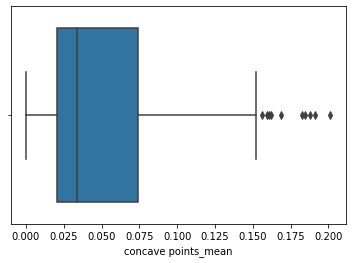

In [15]:
#boxplot of concavepoints_mean
sns.boxplot(tissue_pd['concave points_mean'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fractal_dimension_mean'>

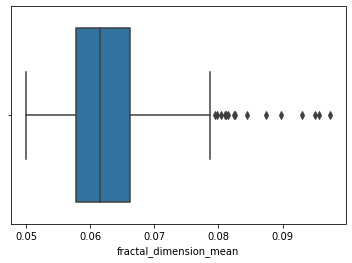

In [16]:
sns.boxplot(tissue_pd['fractal_dimension_mean'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='texture_se'>

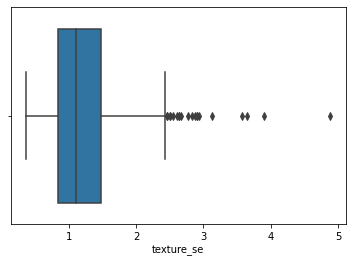

In [17]:
sns.boxplot(tissue_pd['texture_se'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_worst'>

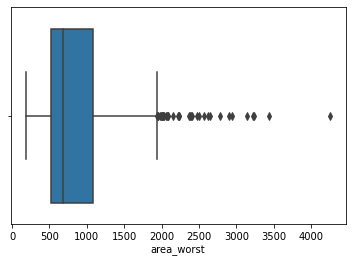

In [18]:
sns.boxplot(tissue_pd['area_worst'])

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='compactness_worst'>

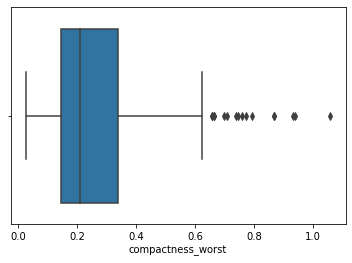

In [19]:
sns.boxplot(tissue_pd['compactness_worst'])

From looking over the boxplots, it is clear that there are some outlier points which would need to be further analyzed. However, when I was reading the original research paper from where this data came from, it mentioned that higher and lower value points for the various measures were usually indicative of malignancy in patients' breast masses. 

Therefore, if we were to eliminate these points, it would disrupt our data and possibiliy minimize the number of malignant diagnoses in our target variable. I will not be removing them then. 

### Visualizations with Target Variable 

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


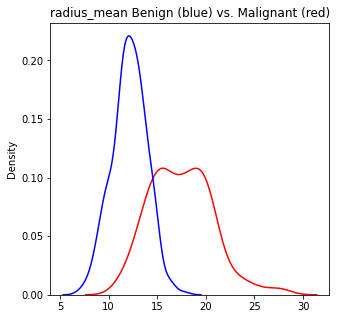

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


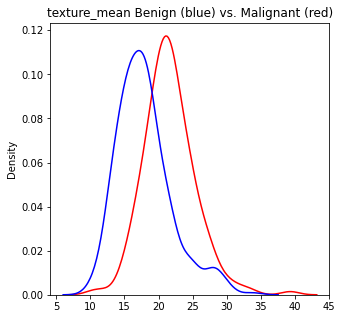

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


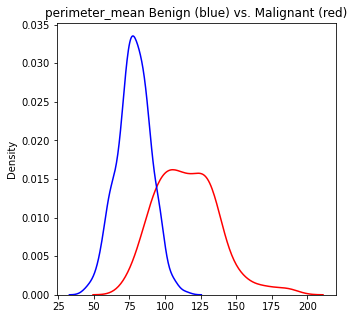

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


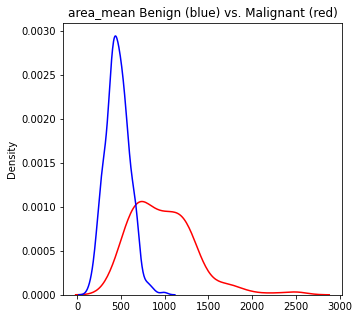

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


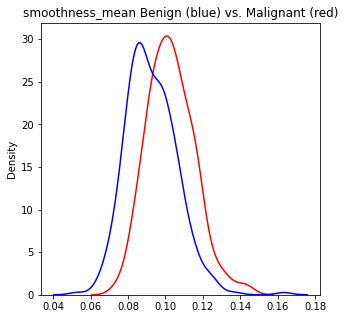

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


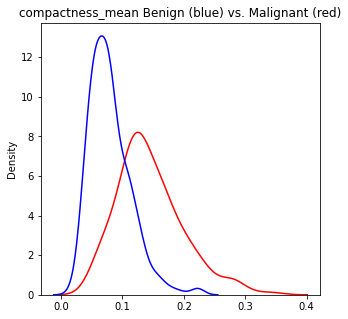

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


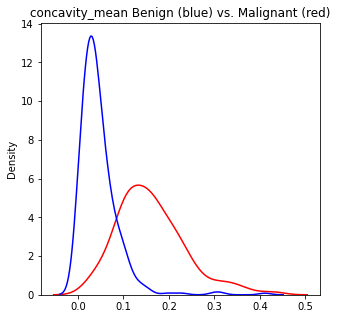

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


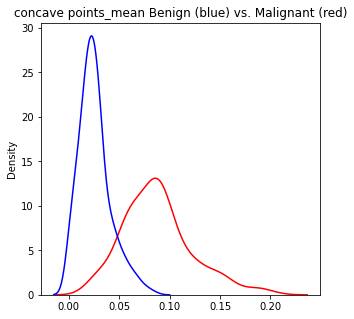

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


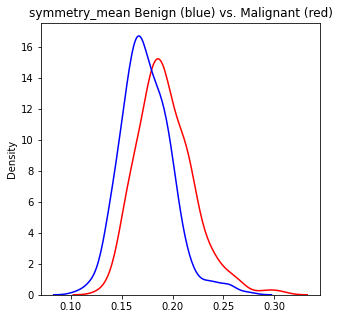

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


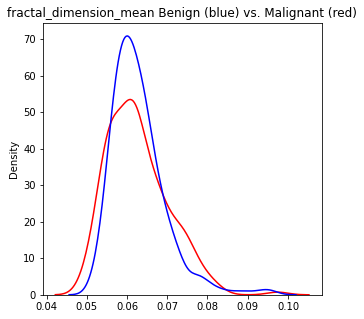

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


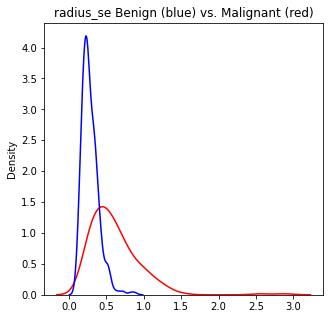

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


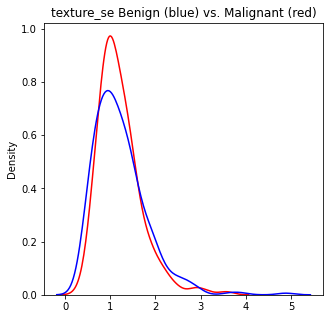

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


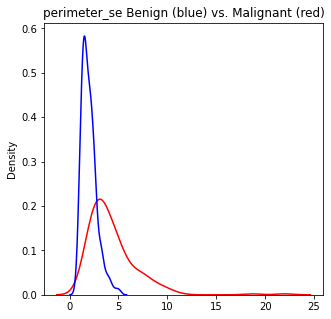

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


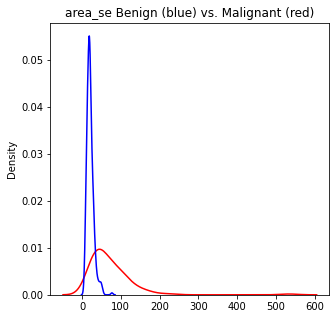

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


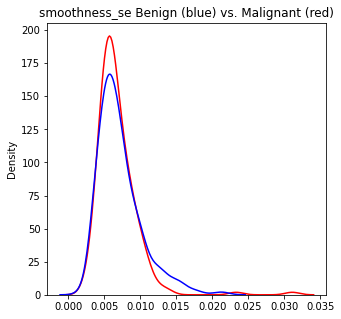

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


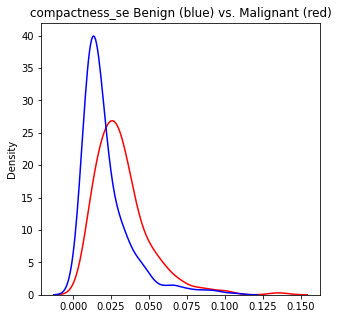

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


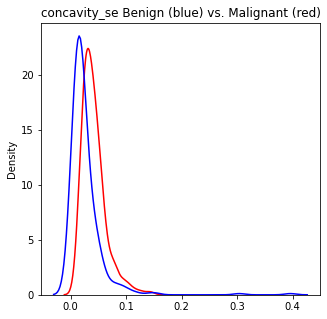

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


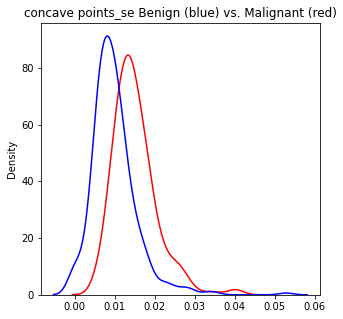

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


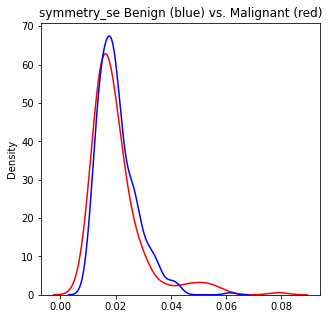

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


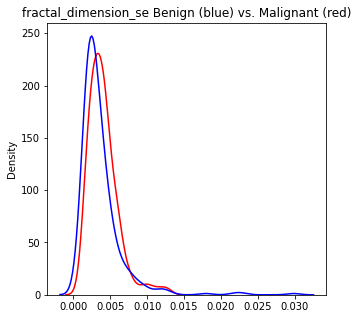

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


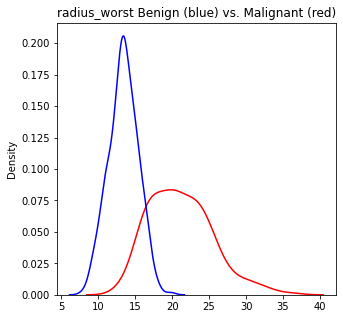

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


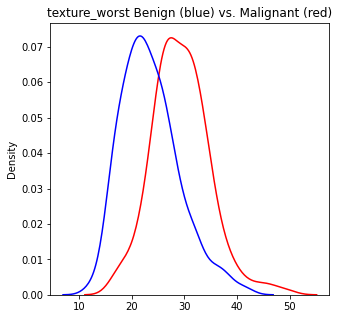

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


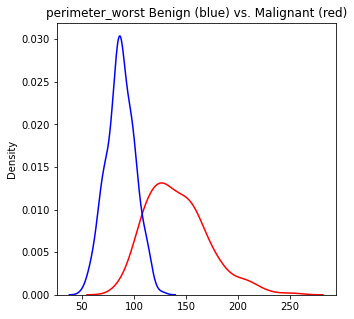

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


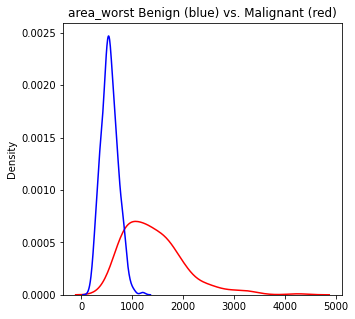

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


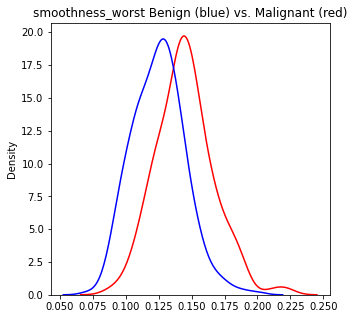

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


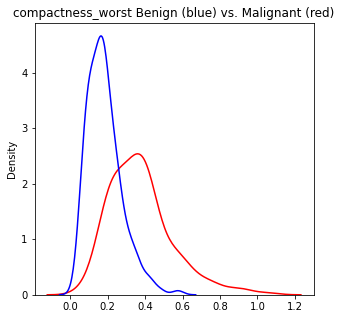

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


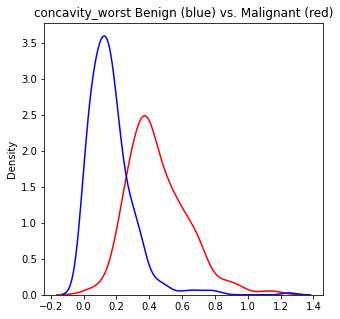

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


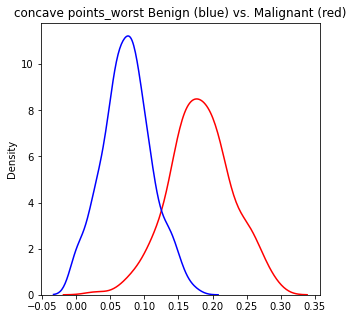

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


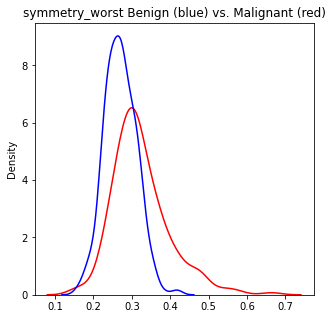

C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


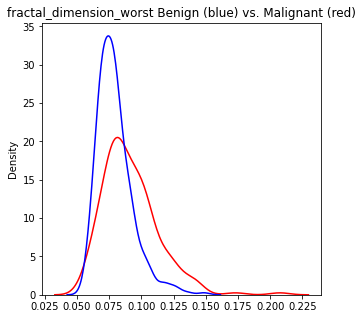

In [20]:
#separating dataframes into diagnosis categories
#malignant
tissue_malignant = tissue_pd.loc[tissue_pd['diagnosis'] == 'M']
#benign
tissue_benign = tissue_pd.loc[tissue_pd['diagnosis'] == 'B']

for column in tissue_pd.columns:
    if column not in  ['id', 'diagnosis']:
        plt.figure(figsize = (5, 5))
        
        #plotting columns from malignant vs. benign as distplot (distribution)
        sns.distplot(a = tissue_malignant[[column]], hist = False, color = 'red')
        sns.distplot(a = tissue_benign[[column]], hist = False, color = 'blue')
        
        plt.title(column + ' Benign (blue) vs. Malignant (red)')
        plt.show()

For the most part, the distributions for the numerical variables between the diagnosis categories are relatively equal, i.e. they overlap. Their means are relatively similar.

There are some cases where there is a more drastic difference in the skew and distribution means, but there is nothing concerning that needs to be taken care of.

### Encoding for Target Variable

In [21]:
#diagnosis
cat_cols = ['diagnosis']

#turning categories into their numerical counterparts using LabelEncoder
for var in cat_cols:
    number = LabelEncoder()
    tissue_pd[var+"cat"] = number.fit_transform(tissue_pd[var].astype('str'))

In [22]:
tissue_pd[['diagnosis','diagnosiscat']]

,diagnosis,diagnosiscat
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
564,M,1
565,M,1
566,M,1
567,M,1


In [23]:
tissue_pd[['diagnosis','diagnosiscat']].value_counts()

diagnosis  diagnosiscat
B          0               357
M          1               212
dtype: int64

B = benign = 0

M = malignant = 1

Now, we can remove the original 'diagnosis' column, since we'll be using the cat column for modeling purposes.

I am also going to remove the 'id' column before we move forward in our analysis, since it is not very useful for our data exploration or modeling.

In [24]:
#dropping diagnosis column
tissue_pd = tissue_pd.drop(['diagnosis','id'],axis='columns')

In [25]:
tissue_pd.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

### Relationship between Variables

#### Correlation

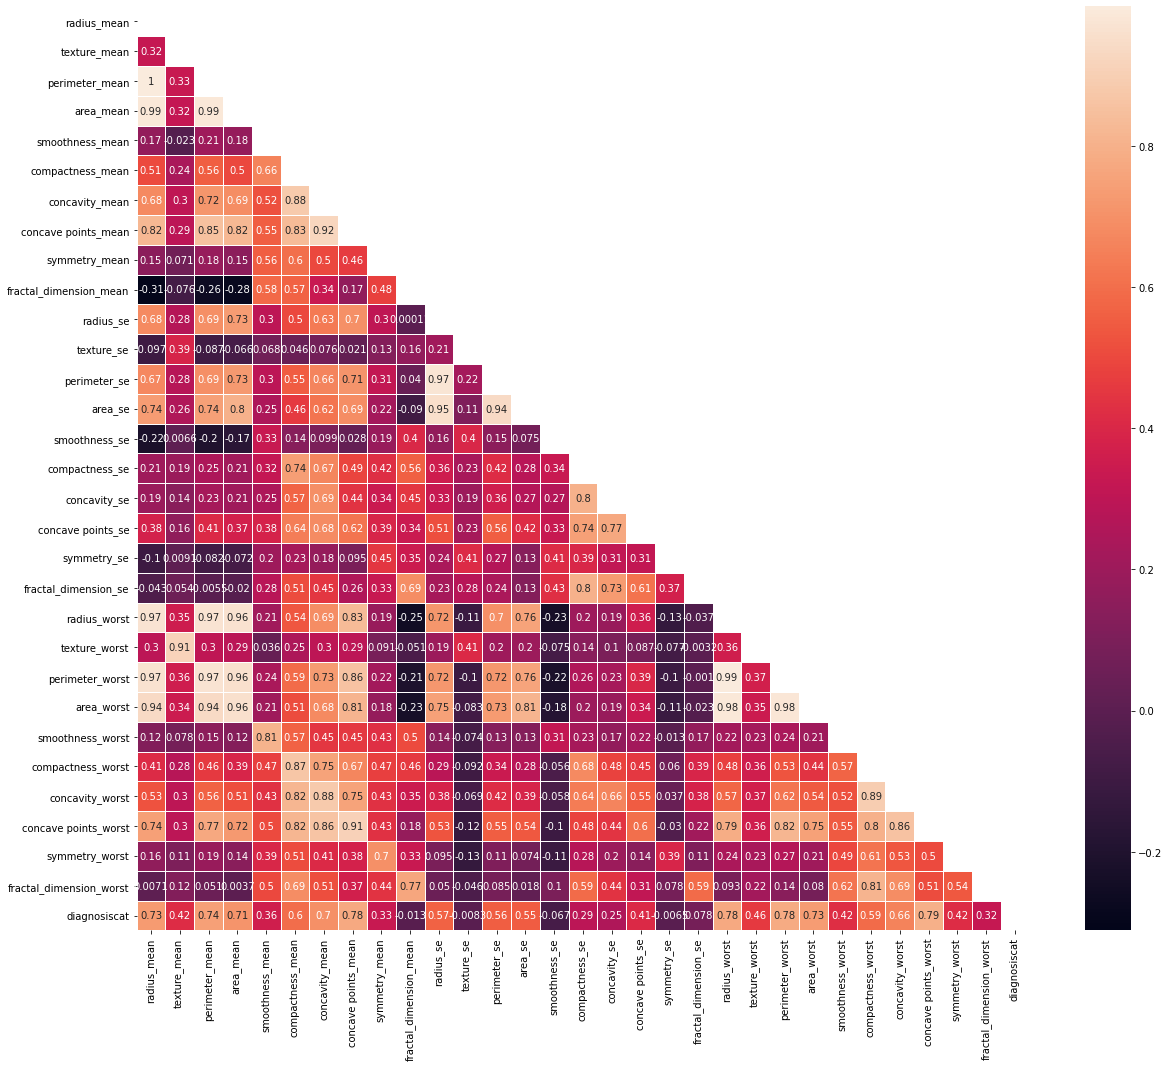

In [26]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 17))
matrix = np.triu(tissue_pd.corr())
sns.heatmap(tissue_pd.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

There are quite a few relationships that feature high positive correlations between columns/variables.

We will have to investigate these to ensure that there is no collinearity in our model. Collinearity is when there is a correlation between predictor variables, such that they express a linear relationship in our regression model. When there is a correlation between predictor variables, it takes away from their ability to predict the outcome variable. 

Some of these high positive correlations make sense given that some of these measures are derived from others in the dataset. For example, the perimeter of a circle is calculated by using the circle's radius ... 2*pi*radius.

Therefore, it may turn out that we don't need all of these measures in predicting our target variable since there are relationships between our predictors in how they get measured.

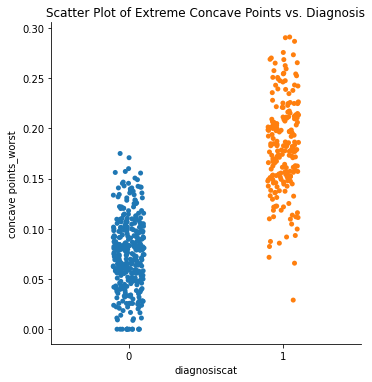

In [27]:
#scatter plot between concave points_worst & diagnosiscat
sns.catplot(x="diagnosiscat", y="concave points_worst", data=tissue_pd).set(title="Scatter Plot of Extreme Concave Points vs. Diagnosis")

When looking at the categorical scatter plot for 'concave points_worst' vs. 'diagnosiscat', it can be seen that there is some overlap between the two diagnosis categoricals for the numerical measure. However, despite the overlap, it seems that higher values of concave points are more telling of a breast mass being malignant than benign.

The overlap between the groups is more in the middle of the range, which makes sense given that there is most likely some grey area where diagnosis is not as clear. 

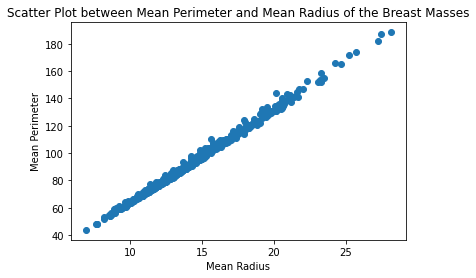

In [28]:
#scatter plot between radius and perimeter
plt.scatter(tissue_pd['radius_mean'], tissue_pd['perimeter_mean'])
plt.xlabel("Mean Radius")
plt.ylabel("Mean Perimeter")
plt.title('Scatter Plot between Mean Perimeter and Mean Radius of the Breast Masses')
plt.show()

A high (almost perfect) positive correlation at 0.998!

### Using VIF for Feature Reduction

VIF or Variance-Inflation Factor will determine if collinearity exists among variables. In the below function, our bounday for feature removal based on VIF is set to 5.0, which would define whether any features are correlated with each other. 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#features --> all variables except for diagnosiscat
x=tissue_pd.drop(['diagnosiscat'],axis=1)
#target variable --> diagnosiscat
y= tissue_pd['diagnosiscat']

In [30]:
#function for calculating the VIF score for each feature to determine if collinearity exists among variable
#finding values with large absolute values greater than 5
#function from https://medium.com/analytics-vidhya/feature-selection-techniques-2614b3b7efcd
def cal_vif(x):
    #threshold for VIF score
    thresh = 5
    output = pd.DataFrame()
    #number of columns
    k = x.shape[1]
    #calculate the VIF for the values in each column in the features
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ',i)
        print(vif)
        #determine the feature with max VIF
        a = np.argmax(vif)
        print('Max vif is for variable no : ',a)
        #if max is not less than the threshold of 5.0, break and keep looking
        if(vif[a]<=thresh):
            break
        #else drop features and keep searching ... recursive
        if(i==1):
            output=x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j)for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)

In [31]:
selected_features = cal_vif(x)
selected_features.head()

Iteration no  1
[63306.17203588469, 251.04710784755466, 58123.58607886575, 1287.262339203524, 393.3981662424482, 200.98035392844344, 157.85504571106995, 154.2412682153576, 184.42655845792981, 629.6798743512951, 236.6657383805606, 24.675366821420543, 211.3963335352582, 72.46646814624141, 26.17024265526989, 44.919650577729094, 33.24409888132221, 53.698656024401444, 37.1764520880579, 27.532630871224278, 9674.74260159131, 343.00438749768904, 4487.781269608321, 1138.7592521939323, 375.5971554566038, 132.88427640334123, 86.31036207218906, 148.67317987683427, 218.91980535900996, 423.3967228281097]
Max vif is for variable no :  0
Iteration no  2
[250.98621003367228, 6937.433971823568, 1203.450804839675, 383.73348193052954, 118.91511263459785, 147.82643700107937, 154.24120696552032, 182.88685591603095, 583.7647370674664, 235.34901585689187, 24.574000749094292, 202.46795593263175, 72.16927132330092, 26.080058722769973, 44.915519460554684, 32.25716122629379, 53.1319706450126, 37.17472404694255, 2

Iteration no  23
[11.176654130350768, 7.10356618382093, 3.8581608934712355, 8.383688175734253, 6.992323779365014, 8.652297855142976, 7.6763024442675984, 9.853676377710157]
Max vif is for variable no :  0
Iteration no  24
[7.103564094635488, 2.190761541406164, 8.347756771541066, 6.666504157385699, 8.648327614210078, 7.644681332828403, 4.620457631474028]
Max vif is for variable no :  4
Iteration no  25
[5.817195921818661, 2.179316366339156, 6.987345633966851, 6.666419752137315, 7.551747392596707, 4.558670173963827]
Max vif is for variable no :  4
Iteration no  26
[5.7084092834529025, 2.156862544529822, 6.005778935127315, 4.2356537773736385, 4.558435525931816]
Max vif is for variable no :  2
Iteration no  27
[2.393834906513735, 2.1479539467716973, 4.083279608339988, 4.553356915544563]
Max vif is for variable no :  3


,texture_se,area_se,concavity_se,concavity_worst
0,0.9053,153.40,0.05373,0.7119
1,0.7339,74.08,0.01860,0.2416
2,0.7869,94.03,0.03832,0.4504
3,1.1560,27.23,0.05661,0.6869
4,0.7813,94.44,0.05688,0.4000


By utilizing the VIF of the variables, we were able to remove/drop variables which had collinearity with each other. The importance of dropping these allows for us to have features which provide unique and indepentent information about the variance within the given dataset. 

Through these iterations, all features were dropped except for the following: texture_se, area_se, concavity_se and concavity_worst.

We will look to use these in our models. 

### Paper Information

Curvature
- deviations from a circle are problematic for malignancy
- can lead to quickly-dividing cells which usually points to cancer
- high or low pints are concerning

Larger values typically indicate a higher likelihood of malignancy

Radius
- averaging the length of the radial line segments defined by the centroid of the snake and the individual snake points

Perimeter
- total distance between snake points

Area

Compactness
- permiter and area are combined
- increases with the irregularity of boundaries


Smoothness

Concavity
- boundary inside of chords

Concave Points

Symmetry

Fractal Dimension
- higher value corresponds to a less regular contour ... higher probability of malignancy

Texture
- variance of the gray scale intensities 

Extreme values are the most intuitively useful for the problem at hand, since only a few malignant cells may occur in a given sample